1. Import libraries

In [ ]:
from fastai.tabular import *

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

2. Import the dataset and put it in the dataframe



In [ ]:
df = pd.read_csv("cardio_train.csv", sep = ';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


3.   Use cont_cat_split() to separate your categorical data from your continuous data. Put the target variable 'cardio' in the dep_var parameter



In [ ]:
conts, cats = cont_cat_split(df, dep_var="cardio")
for cont in conts:
  print("variables continues : {}".format(cont))
for cat in cats:
  print("variables catégoriques : {}".format(cat))

variables continues : id
variables continues : age
variables continues : height
variables continues : weight
variables continues : ap_hi
variables continues : ap_lo
variables catégoriques : gender
variables catégoriques : cholesterol
variables catégoriques : gluc
variables catégoriques : smoke
variables catégoriques : alco
variables catégoriques : active


4. Create an array containing the following classes:
FillMissing,
Categorify,
Normalize


In [ ]:
preprocessing = [FillMissing, Categorify, Normalize]
print(preprocessing)

[<class 'fastai.tabular.transform.FillMissing'>, <class 'fastai.tabular.transform.Categorify'>, <class 'fastai.tabular.transform.Normalize'>]


5.   Separate your dataset in training and a test set. This time, however, only take a list of indexes going from the train and in the test

In [ ]:
mask = np.random.randn(len(df)) <0.8
df_train = df[mask]
df_test = df[~mask]

df_test.index

Int64Index([    2,     3,     8,     9,    13,    18,    21,    22,    26,
               27,
            ...
            69968, 69970, 69972, 69973, 69976, 69979, 69981, 69982, 69983,
            69985],
           dtype='int64', length=14873)

6. Create a Tabulardatabunch that will take the following arguments:

path: any path in Path(),

df: a dataset in the form of a dataframe,

dep_var: the target variable,

valid_idx: indexes of your test set,

procs: The preprocessing steps to do in the dataset,

cat_names: a list of categorical variables

In [ ]:
data = TabularDataBunch.from_df(Path(),
                                df,
                                dep_var="cardio",
                                valid_idx=df_test.index,
                                procs=preprocessing,
                                cat_names = cats
                                )

7. Create a dictionary that will have as key the name of each categorical variable and in value the number of different categories per column




In [ ]:
{key: df[key].nunique() for key in df.loc[:, cats]}

{'active': 2, 'alco': 2, 'cholesterol': 3, 'gender': 2, 'gluc': 3, 'smoke': 2}

8. Create a tabular_learner from your Tabulardatabunch that will take the following arguments:

data: Tabulardatabunch,

Layers: list of inputs in each hidden layer,

metrics: the metric you want to use,

emb_szs: A dictionary giving the number of unique observations in each of your categorical variables


In [ ]:
learn = tabular_learner(data,layers=[200] ,metrics=accuracy, emb_szs={key: df[key].nunique() for key in df.loc[:, cats]})

9. See what your model’s architecture looks like

In [ ]:
learn.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(3, 2)
    (1): Embedding(4, 3)
    (2): Embedding(4, 3)
    (3): Embedding(3, 2)
    (4): Embedding(3, 2)
    (5): Embedding(3, 2)
  )
  (emb_drop): Dropout(p=0.0, inplace=False)
  (bn_cont): BatchNorm1d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=20, out_features=200, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Linear(in_features=200, out_features=2, bias=True)
  )
)

10. Entrainez votre modèle

In [ ]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,accuracy,time
0,0.550947,0.618752,0.736906,00:10
1,0.554044,1.093380,0.734821,00:10
2,0.559447,0.629096,0.671418,00:09
3,0.566048,0.666593,0.634707,00:09
4,0.548312,2.601491,0.732468,00:10
5,0.546771,0.675424,0.701271,00:09
6,0.553792,2.602709,0.737175,00:09
7,0.559093,4.606709,0.736973,00:09
8,0.532586,4.191495,0.739662,00:09
9,0.547046,2.794166,0.738519,00:10


11. Improve our score by tuning our Learning Rate

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 8.32E-06
Min loss divided by 10: 3.31E-03


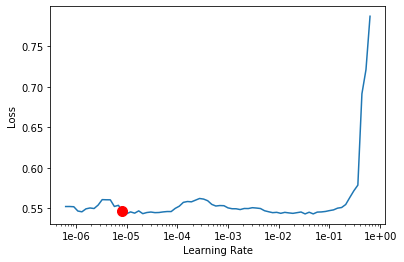

In [ ]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [ ]:
12. Train again your model on 5 epochs

In [ ]:
learn.fit_one_cycle(5, 8.32E-06)

epoch,train_loss,valid_loss,accuracy,time
0,0.545545,1.490480,0.730586,00:10
1,0.549521,4.606092,0.740066,00:09
2,0.541449,0.696512,0.654743,00:09
3,0.543344,4.431064,0.738452,00:10
4,0.553266,4.516391,0.739125,00:10


13. View the results on a confusing matrix

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

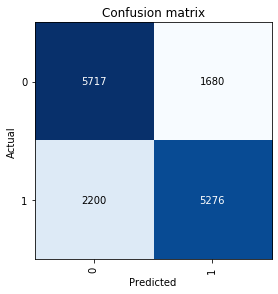

In [ ]:
interp.plot_confusion_matrix()